# Outlier/Anomoly Detection

## what is an outlier ?

* An outlier is an observation that is unlike the other observations.It is rare, or distinct, or does not fit in some way.
* We will generally define outliers as samples that are exceptionally far from the mainstream of the data.

## Causes of Outliers?

* Outliers can have many causes, such as:
1. Measurement or input error.
2. Data corruption.
3. True outlier observation (e.g. Michael Jordan in basketball).

## Problems caused by outliers
* Outliers in the data causes problems during model fitting (esp. linear models).
* Outliers may inflate the error metrics which give higher weights to large errors (example, mean squared error, RMSE).

## Methods to identify outliers in the data

1. Box plots
2. IQR method
3. Z-score method
4. ‘Distance from the mean’ method (Multivariate method)
5. LOF (Local Outlier Factor)
6. Isolation Forest
7. Robust Covariance
8. One-Class SVM
9. One-Class SVM (SGD)


# Lets work with the sklearn wine dataset 

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.DataFrame(load_wine()["data"],columns=load_wine()["feature_names"])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# outlier detection with box plots(Uni-Variate approach)

* Box plots are a visual method to identify outliers. Box plots is one of the many ways to visualize data distribution. 
* Box plot plots the q1 (25th percentile), q2 (50th percentile or median) and q3 (75th percentile) of the data along with (q1–1.5*(q3-q1)) and (q3+1.5*(q3-q1)). 
* Outliers, if any, are plotted as points above and below the plot.

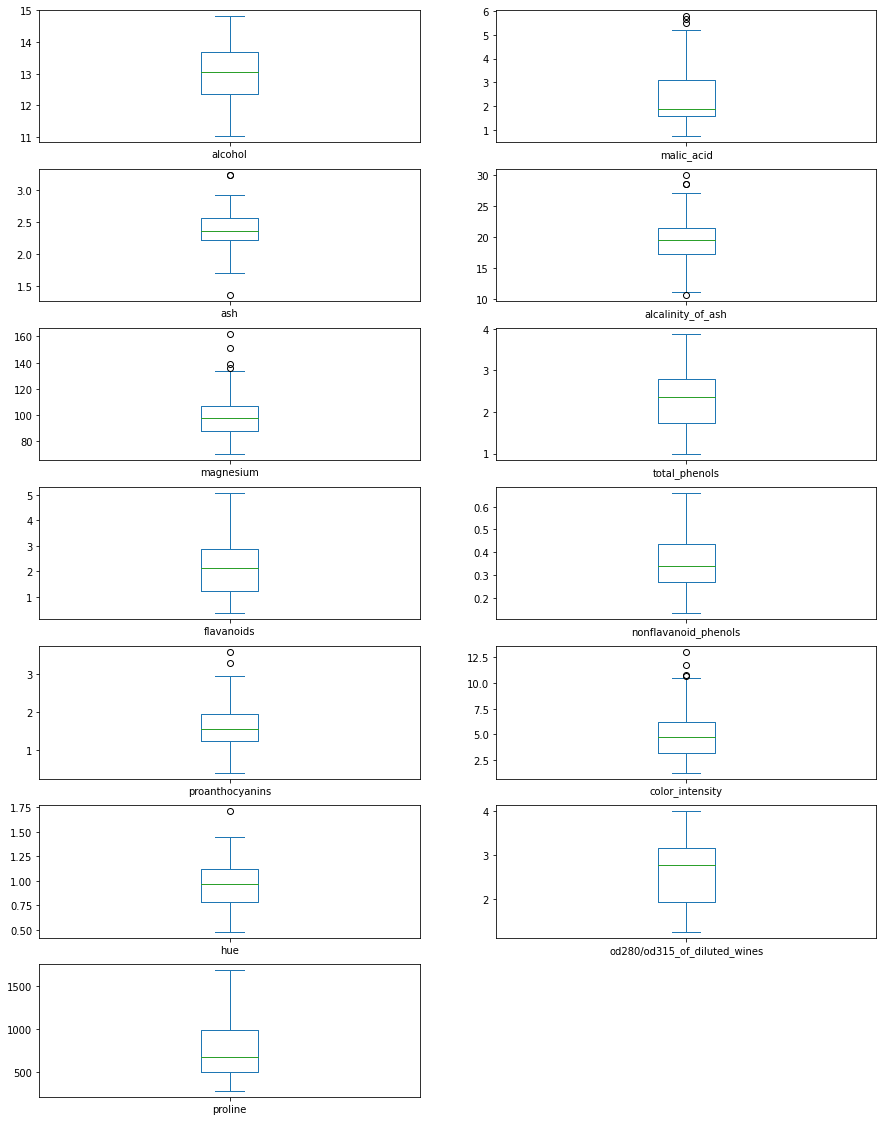

In [2]:
data.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

* In the above plot, outliers are shown as points below and above the box plot. 
* ‘alcohol’, ‘total_phenols’, ‘od280/od315_of_diluted_wines’, and ‘proline’ have no outliers.

## outlier detection using IQR method (Uni-Variate approach)

* IQR method is used by box plot to highlight outliers. IQR stands for interquartile range, which is the difference between q3 (75th percentile) and q1 (25th percentile). 
* The IQR method computes lower bound and upper bound to identify outliers.

<b><center><font color = 'red' size = 6>Lower Bound = q1–1.5*IQR</font></center></b>
<b><center><font color = 'red' size = 6>Upper Bound = q3+1.5*IQR</font></center></b>

![image](https://editor.analyticsvidhya.com/uploads/12311IQR.png)

* Any value below the lower bound and above the upper bound are considered to be outliers.

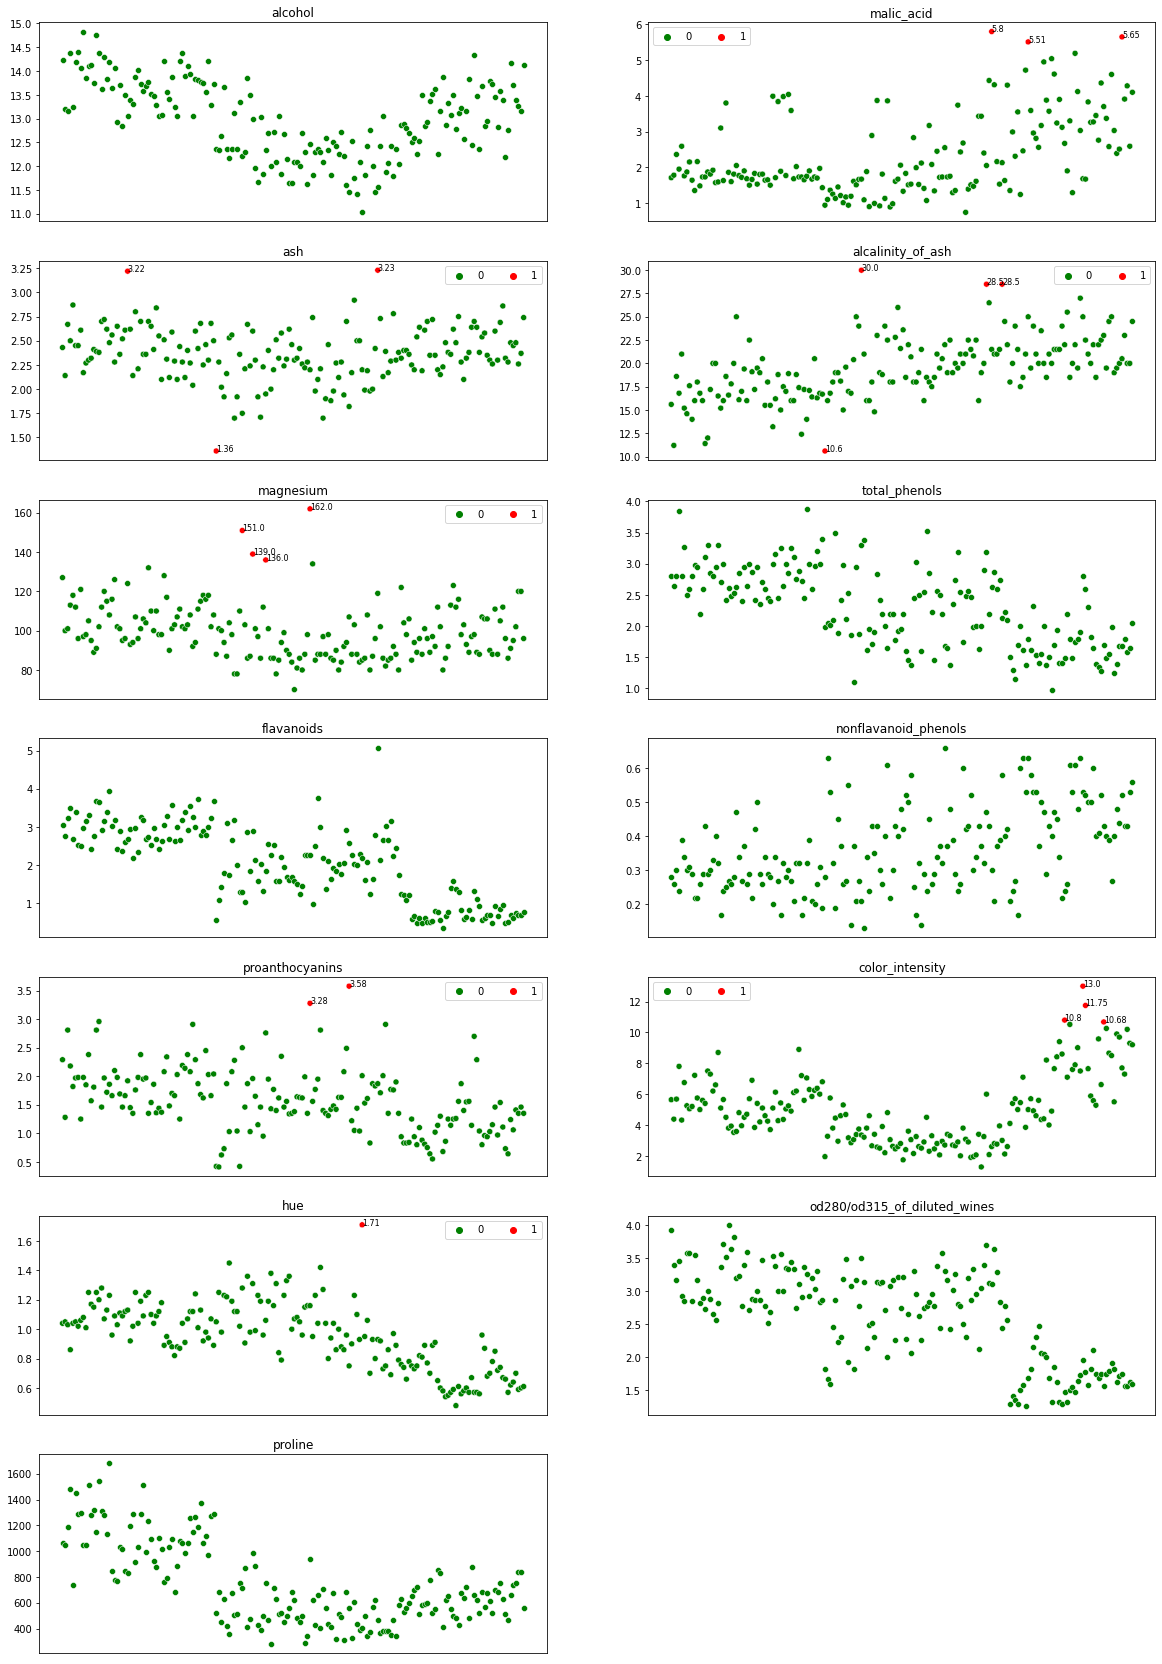

In [4]:
#FUNCTION TO IDENTIFY OUTLIERS USING IQR METHOD
def iqr_outlier(x,factor):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    min_ = q1 - factor * iqr
    max_ = q3 + factor * iqr
    result_ = pd.Series([0] * len(x))
    result_[((x < min_) | (x > max_))] = 1
    return result_
#SCATTER PLOTS HIGHLIGHTING OUTLIERS CALCULATED USING IQR METHOD
fig, ax = plt.subplots(7, 2, figsize=(20, 30))
row = col = 0
for n,i in enumerate(data.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = iqr_outlier(data[i], 1.5)
   
    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(data[i])), y = data[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(data[i])), y = data[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(data[i]))[outliers == 1], data[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
ax[row,col].axis('off')
plt.show()

* In the above plot, as seen in the box plot, ‘alcohol’, ‘total_phenols’, ‘od280/od315_of_diluted_wines’, and ‘proline’ have no outliers.

## outlier detection using Z-score method (Uni-Variate approach)

* Z-score method is another method for detecting outliers. This method is generally used when a variable’ distribution looks close to Gaussian. 
* Z-score is the number of standard deviations a value of a variable is away from the variable’s mean.

<b><center><font color = 'red' size = 6>Z-Score = (X-mean) / Standard deviation</font></center></b>

* when the values of a variable are converted to Z-scores, then the distribution of the variable is called standard normal distribution with mean=0 and standard deviation=1. 
* The Z-score method requires a cut-off specified by the user, to identify outliers. The widely used lower end cut-off is -3 and the upper end cut-off is +3. 
* The reason behind using these cut-offs is, 99.7% of the values lie between -3 and +3 in a standard normal distribution. 

![image](https://editor.analyticsvidhya.com/uploads/39536outlierdetection.png)

* conversion to z-score

![image](https://www.simplypsychology.org/Z-score-formula.jpg)


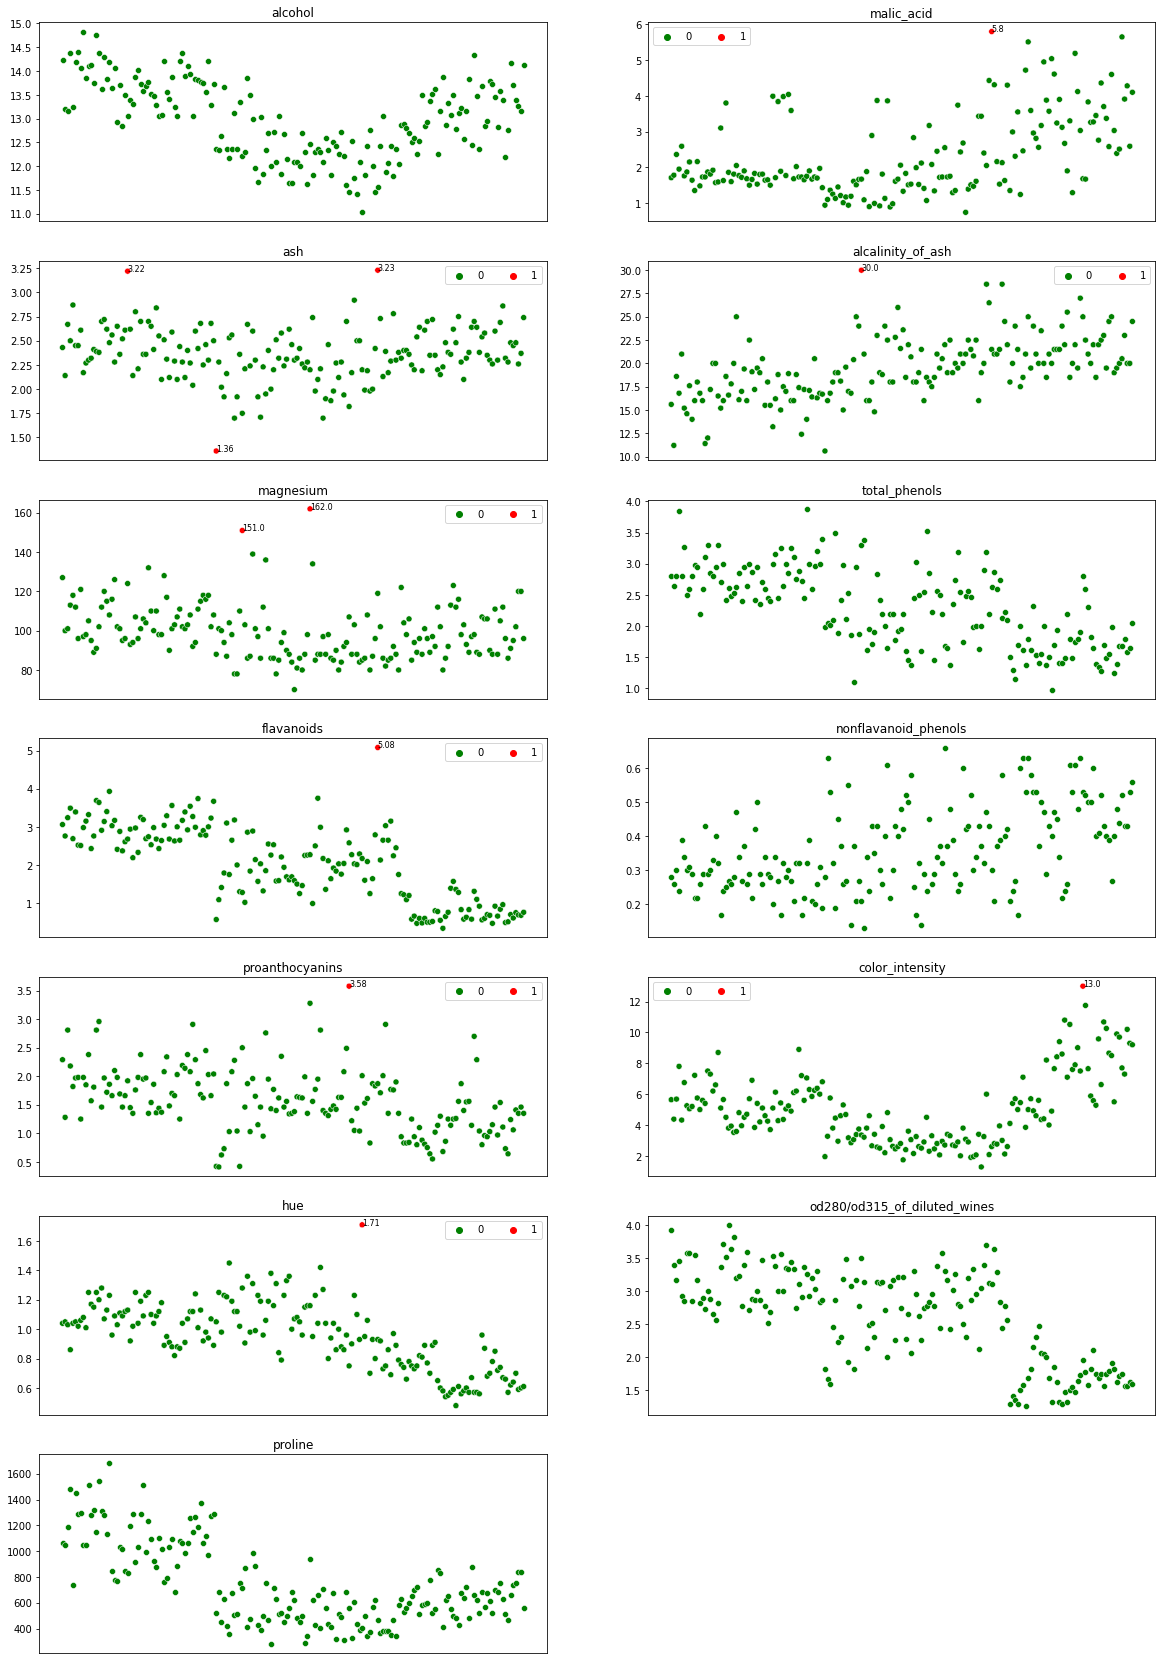

In [5]:
#FUNCTION TO DETECT OUTLIERS USING Z-SCORE METHOD
def zscore_outlier(x,lb,ub):
    zscore = ((x - x.mean()) / x.std()).copy()
    result_ = pd.Series([0] * len(x))
    result_[((zscore < lb) | (zscore > ub))] = 1
    return result_
#PLOTTING A SCATTER PLOT AND HIGHLIGHTING THE OUTLIERS DETECTED BY Z-SCORE METHOD
fig, ax = plt.subplots(7, 2, figsize=(20, 30))
row = col = 0
for n,i in enumerate(data.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = zscore_outlier(data[i], -3, 3)
   
    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(data[i])), y = data[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(data[i])), y = data[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(data[i]))[outliers == 1], data[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
ax[row,col].axis('off')
plt.show()

## outlier detection using ‘Distance from the mean’ method (Multivariate method)

* Unlike the previous methods, this method considers multiple variables in a data set to detect outliers. 
* This method calculates the Euclidean distance of the data points from their mean and converts the distances into absolute z-scores. 
* Any z-score greater than the pre-specified cut-off is considered to be an outlier. 
* We’ll consider two variables (‘malic_acid’ and ‘magnesium’) of the wine dataset for implementing this method in Python using a cut-off of 3.


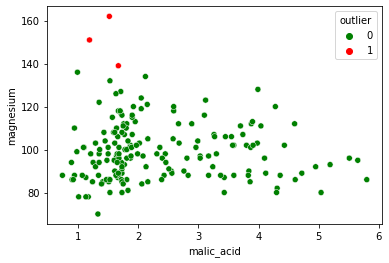

In [19]:
def euclidean_distance_outlier(x,cutoff):
    result_ = pd.Series([0] * len(x))
    data_mean = x.mean() # mean of data
    #print(data_mean)
    #print(x)
    #print((x-data_mean))
    #print((x-data_mean)**2)
    dist = np.sqrt(np.sum(((x-data_mean) ** 2),axis=1)) #Euclidean distance
    #print(dist)
    dist_mean = dist.mean() #mean of the distances
    dist_zscore = np.abs((dist - dist_mean) / dist.std())#z-score of the distances
    result_[((dist_zscore > cutoff))] = 1
    return result_
euc_d = data[["malic_acid","magnesium"]].copy()
euc_d['outlier'] = euclidean_distance_outlier(euc_d,3)
sns.scatterplot(x="malic_acid",y="magnesium",data=euc_d,hue="outlier",palette=["green","red"])


## lets consider entire dataset

0    176
1      2
Name: outlier, dtype: int64


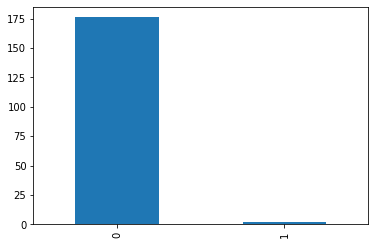

In [23]:
data_euc = data.copy()
data_euc['outlier'] = euclidean_distance_outlier(data_euc,3)
print(data_euc['outlier'].value_counts())
data_euc['outlier'].value_counts().plot.bar()

## Outlier detection using Local Outlier Factor

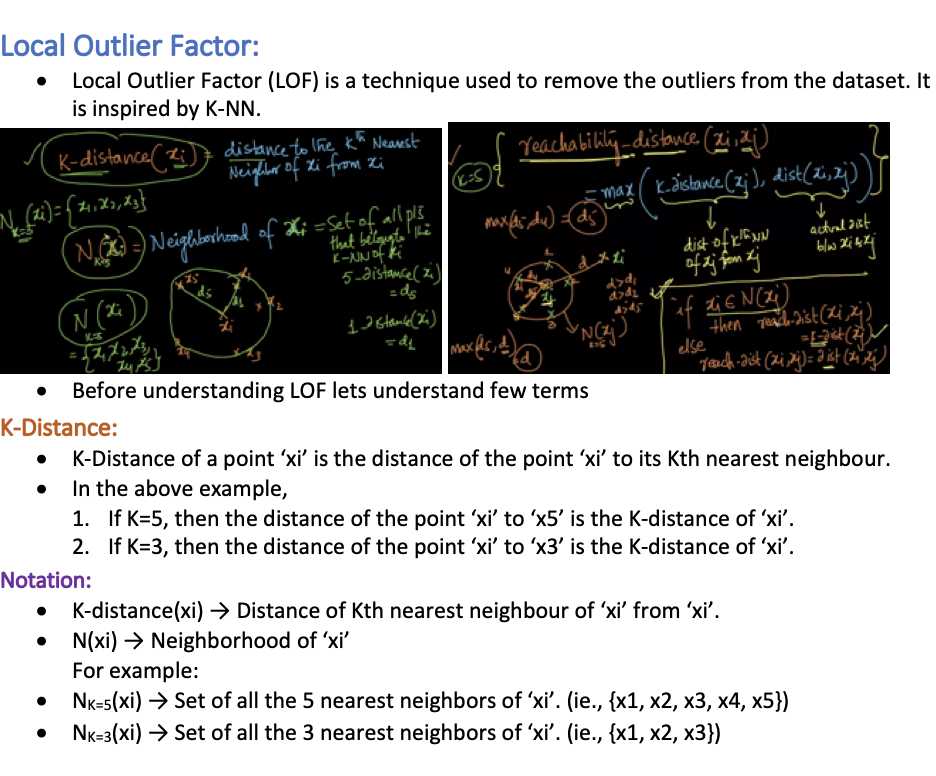

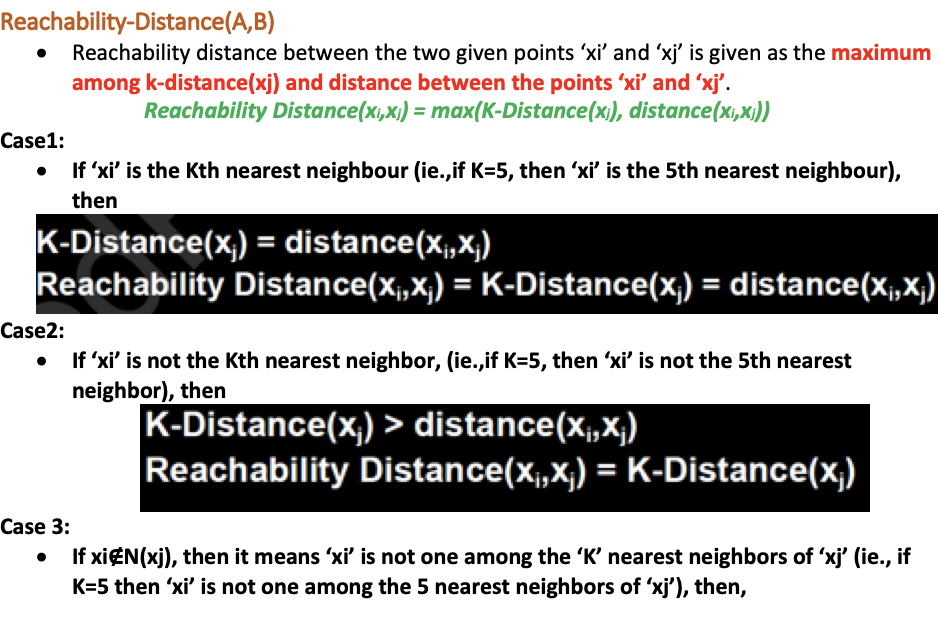

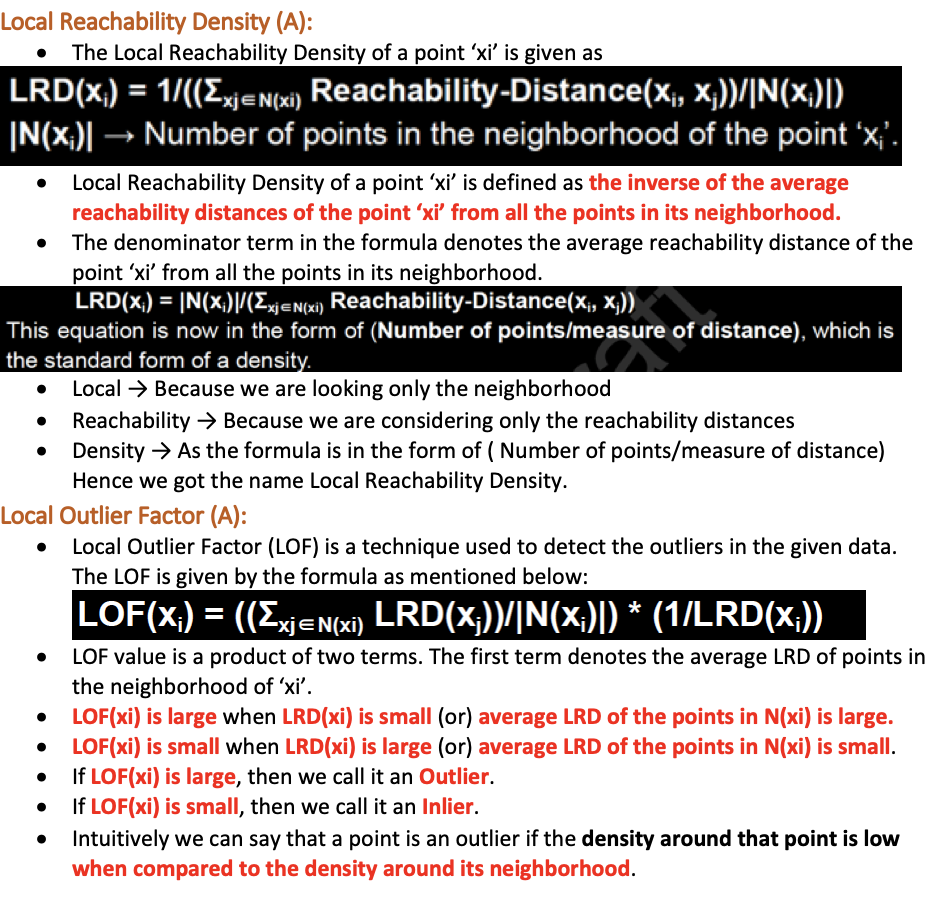

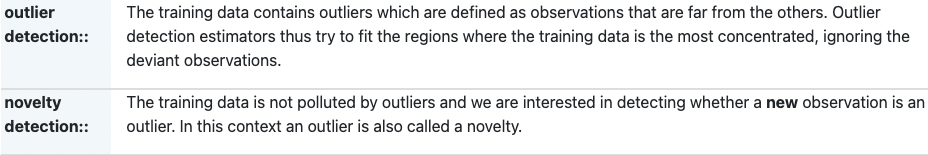

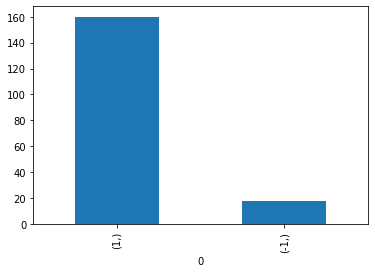

In [28]:
from sklearn.neighbors import LocalOutlierFactor
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(data)
# Predict the labels (1 inlier, -1 outlier) of X according to LOF
pd.DataFrame(y_pred).value_counts().plot.bar()

## Outlier detection using Isolation forest

* Isolation Forests(IF), similar to Random Forests, are build based on decision trees. And since there are no pre-defined labels here, it is an unsupervised model.

* IsolationForests were built based on the fact that anomalies are the data points that are “few and different”.

* In an Isolation Forest, randomly sub-sampled data is processed in a tree structure based on randomly selected features. The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them. Similarly, the samples which end up in shorter branches indicate anomalies as it was easier for the tree to separate them from other observations.

## How do Isolation Forests work?

* Isolation Forests are nothing but an ensemble of binary decision trees. And each tree in an Isolation Forest is called an Isolation Tree(iTree). The algorithm starts with the training of the data, by generating Isolation Trees.

## Step by Step algorithm

1. When given a dataset, a random sub-sample of the data is selected and assigned to a binary tree.
2. Branching of the tree starts by selecting a random feature (from the set of all N features) first. And then branching is done on a random threshold ( any value in the range of minimum and maximum values of the selected feature).
3. If the value of a data point is less than the selected threshold, it goes to the left branch else to the right. And thus a node is split into left and right branches.
4. This process from step 2 is continued recursively till each data point is completely isolated or till max depth(if defined) is reached.
5. The above steps are repeated to construct random binary trees.

* After an ensemble of iTrees(Isolation Forest) is created, model training is complete. 

## Scoring
* During scoring, a data point is traversed through all the trees which were trained earlier. 
* Now, an ‘anomaly score’ is assigned to each of the data points based on the depth of the tree required to arrive at that point. 
* This score is an aggregation of the depth obtained from each of the iTrees. 
* An anomaly score of -1 is assigned to anomalies and 1 to normal points based on the contamination(percentage of anomalies present in the data) parameter provided.

![](https://editor.analyticsvidhya.com/uploads/32290IF.png)

In [55]:
from sklearn.ensemble import IsolationForest
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest
data_isolation = data.copy()
random_state = np.random.RandomState(42)
model=IsolationForest(n_estimators=100,max_samples='auto',random_state=random_state)
model.fit(data_isolation)
print(model.get_params())

{'bootstrap': False, 'contamination': 'auto', 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7FE0B6BDE490, 'verbose': 0, 'warm_start': False}


In [56]:
score = model.decision_function(data_isolation)
data_isolation['anomaly_score'] = model.predict(data_isolation)
data_isolation['scores'] = score
data_isolation[data_isolation['anomaly_score']==1].head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,anomaly_score,scores
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1,0.045357
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1,0.066261
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1,0.075955
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1,0.079290
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,1,0.065411


## Limitations of Isolation Forest:

Isolation Forests are computationally efficient and
have been proven to be very effective in Anomaly detection. Despite its advantages, there are a few limitations as mentioned below.

* The final anomaly score depends on the contamination parameter, provided while training the model. This implies that we should have an idea of what percentage of the data is anomalous beforehand to get a better prediction.

* Also, the model suffers from a bias due to the way the branching takes place.

# outlier detection with robust covariance

* For gaussian independent features, simple statistical techniques can be employed to detect anomalies in the dataset. For a gaussian/normal distribution, the data points lying away from 3rd deviation can be considered as anomalies.

* For a dataset having all the feature gaussian in nature, then the statistical approach can be generalized by defining an elliptical hypersphere that covers most of the regular data points, and the data points that lie away from the hypersphere can be considered as anomalies.

In [58]:
from sklearn.covariance import EllipticEnvelope
# https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html#sklearn.covariance.EllipticEnvelope
outlier_robust = EllipticEnvelope(random_state=0).fit(data)
outlier_robust.predict(data)
# Returns -1 for outliers and 1 for inliers.

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

## One Class SVM:

A regular SVM algorithm tries to find a hyperplane that best separates the two classes of data points. For one-class SVM where we have one class of data points, and the task is to predict a hypersphere that separates the cluster of data points from the anomalies.

In [63]:
# https://scikit-learn.org/stable/
from sklearn import svm
from sklearn import linear_model
clf = svm.OneClassSVM(gamma='auto').fit(data)
clf.predict(data)
# Returns -1 for outliers and 1 for inliers.

array([-1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,
        1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1,
       -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,
       -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
       -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,
        1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,
        1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,
        1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,
        1, -1, -1, -1,  1, -1, -1,  1])

# One Class SVM (SGD):

* One-class SVM with SGD solves the linear One-Class SVM using Stochastic Gradient Descent. The implementation is meant to be used with a kernel approximation technique to obtain results similar to sklearn.svm.OneClassSVM which uses a Gaussian kernel by default.

In [64]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDOneClassSVM.html#sklearn.linear_model.SGDOneClassSVM
clf = linear_model.SGDOneClassSVM(random_state=42).fit(data)
clf.predict(data)
# Returns -1 for outliers and 1 for inliers.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

# Anomoly/Outlier treatment

After detecting the outlier we should remove\treat the outlier because it is a silent killer!!.yes..

* Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.
* It increases the error variance and reduces the power of statistical tests.
* If the outliers are non-randomly distributed, they can decrease normality.
* Most machine learning algorithms do not work well in the presence of outlier.So it is desirable to detect and remove outliers.
* They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.
* With all these reasons we must be careful about outlier and treat them before build a statistical/machine learning model. 
* There are some techniques used to deal with outliers.
1. Deleting observations
2. Transforming values
3. Imputation
4. Separately treating


1. Deleting observations

>> Sometimes it’s best to completely remove those records from your dataset to stop them from skewing your analysis. We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers. But deleting the observation is not a good idea when we have small dataset.


2. Transforming values:

* Transforming variables can also eliminate outliers. These transformed values reduces the variation caused by extreme values.

1. Scaling
2. Log transformation
3. Cube Root Normalization
4. Box-transformation

* These techniques convert values in the dataset to smaller values.
* If the data has to many extreme values or skewed, this method helps to make  data normal.
* But These technique not always give you the best results.
* There is no lose of data from these methods.

3. Imputation

>> Like imputation of missing values, we can also impute outliers. 

>> We can use mean, median, zero value in this methods. 

>> Since we imputing there is no loss of data. median is appropriate because it is not affected by outliers.

4. Separately treating

* If there are significant number of outliers and dataset is small , we should treat them separately in the statistical model. 
* One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output. 
* But this technique is tedious when the dataset is large.